In [1]:
import scarlet 
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scp
import scipy.ndimage as smp

(1, 20, 20)


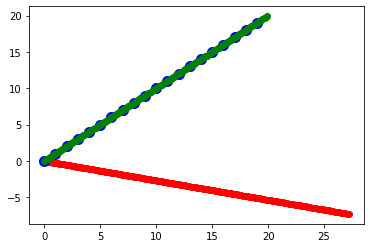

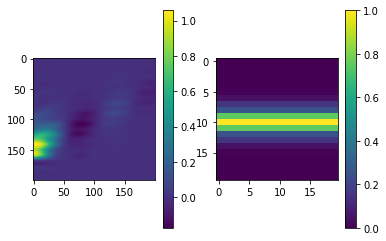

CPU times: user 4.27 s, sys: 876 ms, total: 5.15 s
Wall time: 1.71 s
CPU times: user 193 µs, sys: 54 µs, total: 247 µs
Wall time: 207 µs
CPU times: user 816 µs, sys: 293 µs, total: 1.11 ms
Wall time: 889 µs


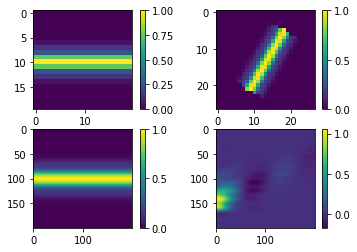

In [17]:
n1,n2 = 20,20
arr = np.zeros((1,n1, n2))
print(arr.shape)
theta = np.pi/3.


arr[:,10,:] = 1
arr[:,9,:] = 0.75
arr[:,11,:] = 0.75
arr[:,8,:] = 0.5
arr[:,12,:] = 0.5
arr[:,8,:] = 0.25
arr[:,12,:] = 0.25
arr[:,7,:] = 0.15
arr[:,13,:] = 0.15
arr[:,6,:] = 0.05
arr[:,14,:] = 0.05
arr[:,5,:] = 0.01
arr[:,15,:] = 0.01
x = np.array(range(n1))
y = np.array(range(n2))

xx = np.array(range(200))*n1/200. 
yy = np.array(range(200))*n2/200. 
coord = (x,y)
X = (xx)*np.cos(theta) + (yy)*np.sin(theta)
Y = -(xx)*np.sin(theta)+(yy)*np.cos(theta)
coord_hr = (X,Y)

plt.plot(X[:],Y[:],'ro')

plt.plot(x[:],y[:], 'bo', markersize = 10)
plt.plot(xx[:],yy[:], 'go')
plt.show()

angle = (np.cos(theta), np.sin(theta))

%time interp = scarlet.interpolation.sinc_interp(arr, coord_hr, coord, angle = angle, padding = 300)

%time scinterp = scp.RectBivariateSpline(x,y,arr[0])

%time rot = smp.rotate(arr[0], 60)
print(scinterp)

plt.subplot(221)
plt.imshow(arr[0,:,:]); plt.colorbar()
plt.subplot(222)
plt.imshow(rot); plt.colorbar()
plt.subplot(223)
plt.imshow(scinterp(xx,yy)); plt.colorbar()
plt.subplot(224)
plt.imshow(interp[0]); plt.colorbar()
plt.show()